# Agrupamento WholeSales Customers

> * ***Integrantes:***
>   * Davi Mota Campos 12411BCC054
>   * Felipe Roza Bonetti 12011BCC032
>   * Guilherme Castilho Machado 12021BSI225
>   * Gustavo Melo do Carmo 11721BCC035
>   * Marcelo Prado Ribeiro 12021BCC012
>   * Miguel Borges de Rezende Costa 12111BCC019
>   * Tarick Tavares Prado Cruz 12111FIS216
>   * Tiago de Paula Alves 12011BCC040
>   * Vitor Santini Bessa 11821BCC010


> * Colunas do Dataset

1. **Channel (Canal)**:
   - **Descrição**: Indica o canal de venda pelo qual o cliente fez a compra.
   - **Valores**: 1 para Horeca (Hotel/Restaurante/Cafeteria), 2 para Retail (Varejo).

2. **Region (Região)**:
   - **Descrição**: Indica a região geográfica do cliente.
   - **Valores**: 1 para Lisboa, 2 para Porto, 3 para Outras.

3. **Fresh (Frescos)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em produtos frescos.
   - **Exemplo**: Frutas e legumes frescos.

4. **Milk (Leite)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em leite e produtos lácteos.
   - **Exemplo**: Leite, queijo, iogurte.

5. **Grocery (Mercearia)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em produtos de mercearia.
   - **Exemplo**: Produtos enlatados, arroz, café.

6. **Frozen (Congelados)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em produtos congelados.
   - **Exemplo**: Carnes congeladas, vegetais congelados.

7. **Detergents_Paper (Detergentes e Papel)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em detergentes e produtos de papel.
   - **Exemplo**: Sabão em pó, toalhas de papel.

8. **Delicassen (Produtos de Delicatessen)**:
   - **Descrição**: Gasto anual (em unidades monetárias) em produtos de delicatessen.
   - **Exemplo**: Produtos gourmet, comidas finas, queijos especiais.


> * Importar as bibliotecas necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Carregamento e Exploração dos Dados

In [ ]:
#data_customers = pd.read_csv("Wholesale customers data.csv")
data_customers = pd.read_csv('https://drive.google.com/uc?id=1inolmSrX5vQnQXCkdOylrVknG2nRqQDn')

print(data_customers.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
data_customers.shape

(440, 8)

## Pré-processamento dos Dados

In [ ]:
# Descrição estatística dos dados
print("\nDescrição estatística dos dados:")
data_customers.describe()


Descrição estatística dos dados:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
print(data_customers['Channel'].value_counts())
print(data_customers['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


> * Como as colunas `Channel` e `Region` representam valores discretos elas serao descartadas, pois poderia afetar nossos clusters

In [ ]:
data_customers.drop(columns=['Channel','Region'],inplace=True)


In [ ]:
data_customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


> * Normalizar os dados

In [ ]:
scale = StandardScaler()
data_customers_sc = scale.fit_transform(data_customers)

In [ ]:
df_customers_sc = pd.DataFrame(data_customers_sc,columns=data_customers.columns)
df_customers_sc.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
df_customers_sc.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


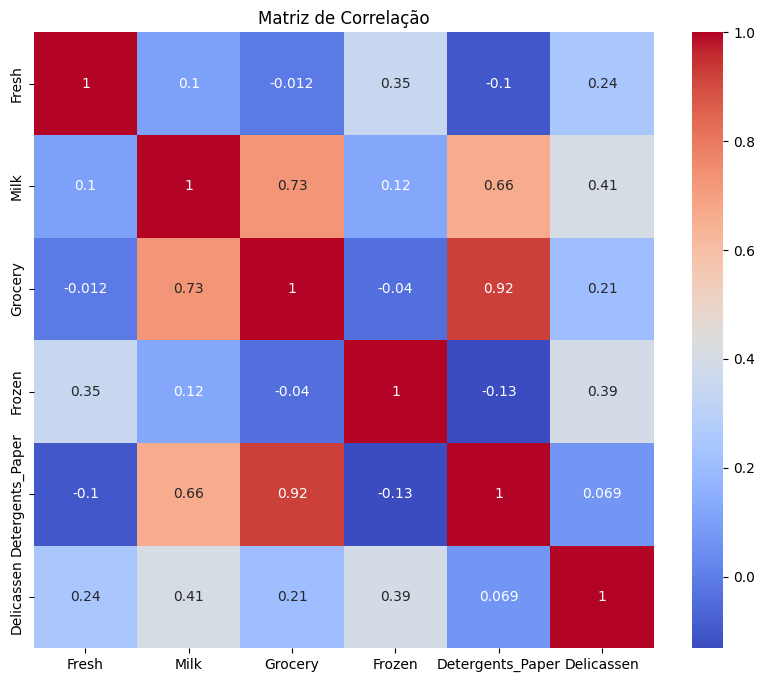

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_customers_sc.corr()

# Visualizar a matriz de correlação com seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


## Aplicação do modelo


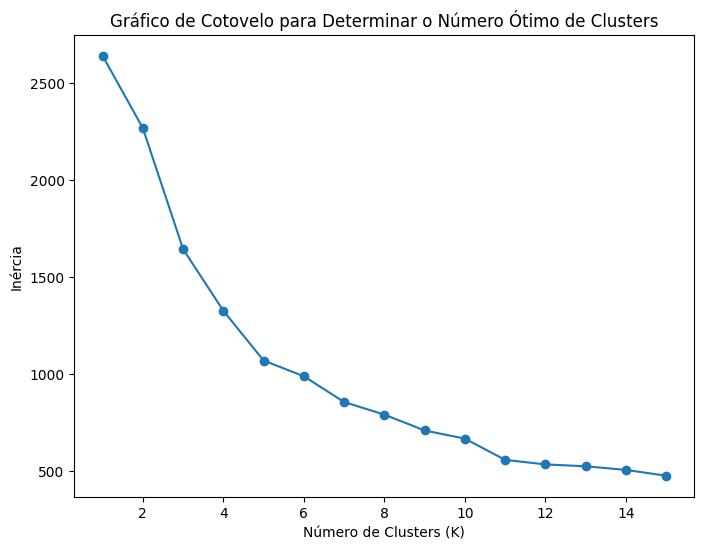

O melhor valor de K eh: 3


In [ ]:
def plot_cotovelo(df):
    k_values = range(1, 16)
    # Lista para armazenar a inércia para cada valor de K
    inertia = []

    # Testar valores de K de 1 a 11
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    # Plotar o gráfico de cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inércia')
    plt.title('Gráfico de Cotovelo para Determinar o Número Ótimo de Clusters')
    plt.show()

    # Identify the optimal K using the "elbow" method
    diff = np.diff(inertia)
    k_optimal = k_values[np.argmin(diff) + 1]

    print(f"O melhor valor de K eh: {k_optimal}")


plot_cotovelo(df_customers_sc)

> * Inercia muito alta entao

In [ ]:
def remove_outliers(data, factor=0.6):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    data_no_outliers = data
    for _ in range(3):
        data_no_outliers = data_no_outliers[~((data_no_outliers < lower_bound) | (data_no_outliers > upper_bound)).any(axis=1)]

    return data_no_outliers

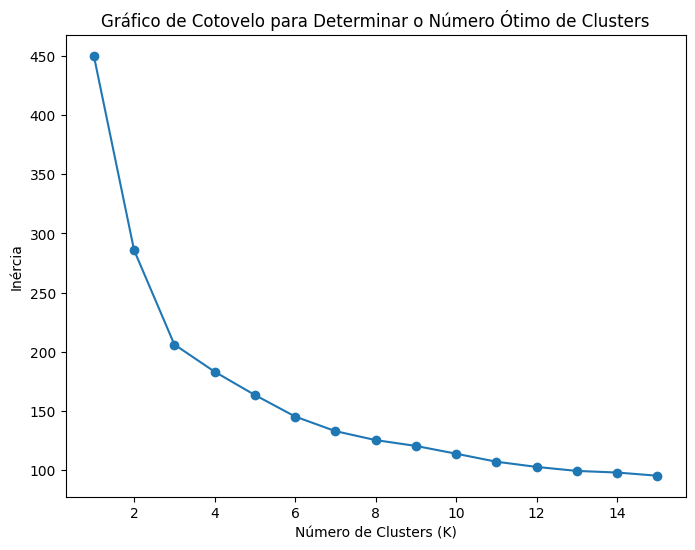

O melhor valor de K eh: 2


In [ ]:
data_no_outliers = remove_outliers(df_customers_sc, 1.5)
plot_cotovelo(data_no_outliers)

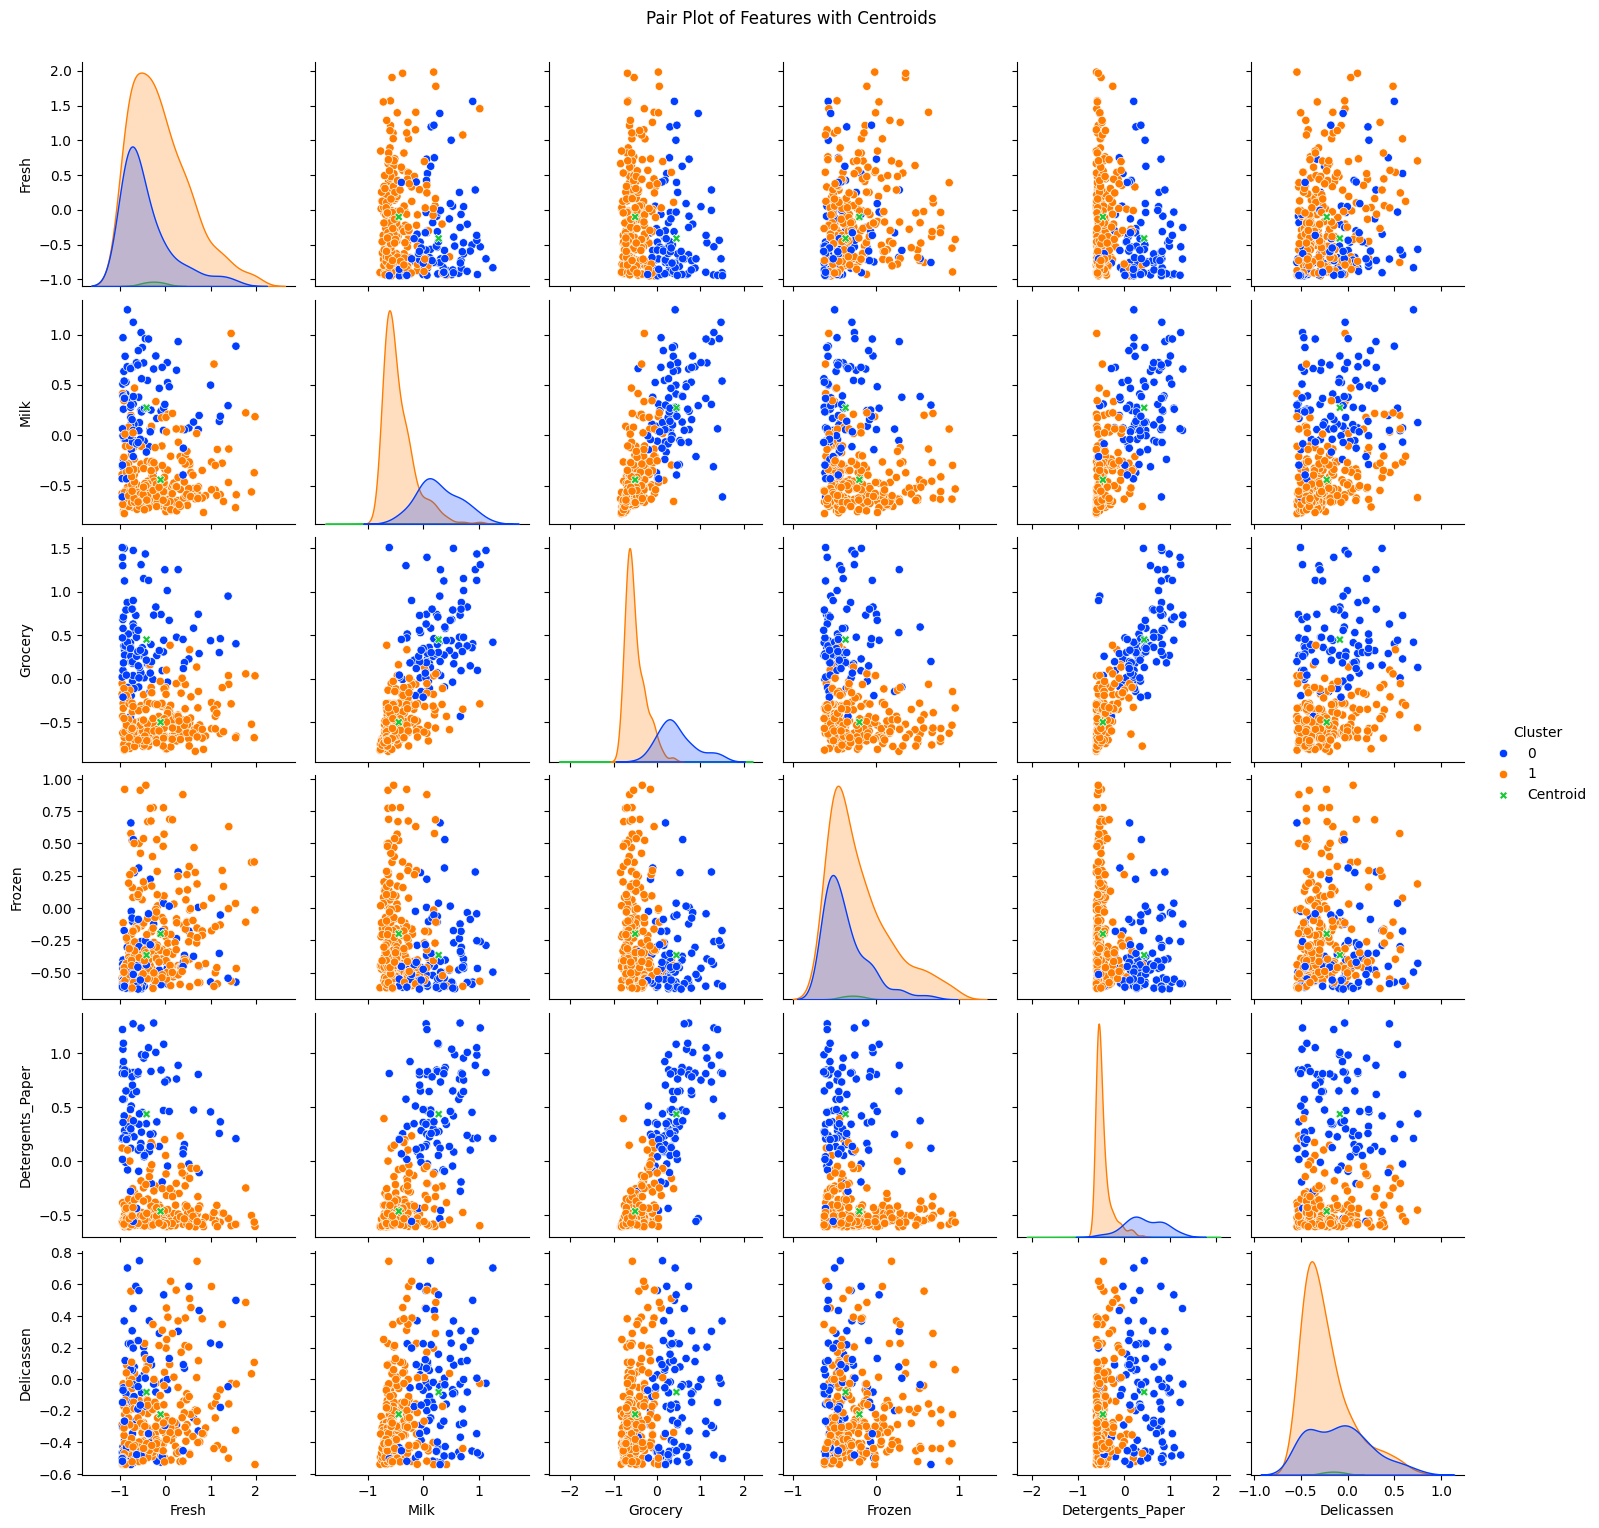

In [ ]:
def kmeans_plot(data, k):
    features = data.columns

    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Adicionar clusters aos dados
    df = pd.DataFrame(data, columns=features)
    df['Cluster'] = kmeans.labels_

    # Adicionar centróides ao DataFrame
    centroids_df_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=features)
    centroids_df_scaled['Cluster'] = ['Centroid'] * kmeans.n_clusters
    combined_df_scaled = pd.concat([df, centroids_df_scaled], ignore_index=True)

    # Plotar Pairplot
    sns.pairplot(combined_df_scaled, hue='Cluster', palette='bright', markers=['o']*kmeans.n_clusters + ['X'])
    plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
    plt.show()

kmeans_plot(data_no_outliers, k=2)


Distribuição de Channel nos Clusters:
Cluster  Channel
0        2           80
         1           19
1        1          218
         2           15
Name: count, dtype: int64

Distribuição de Region nos Clusters:
Cluster  Region
0        3          78
         1          13
         2           8
1        3         161
         1          47
         2          25
Name: count, dtype: int64


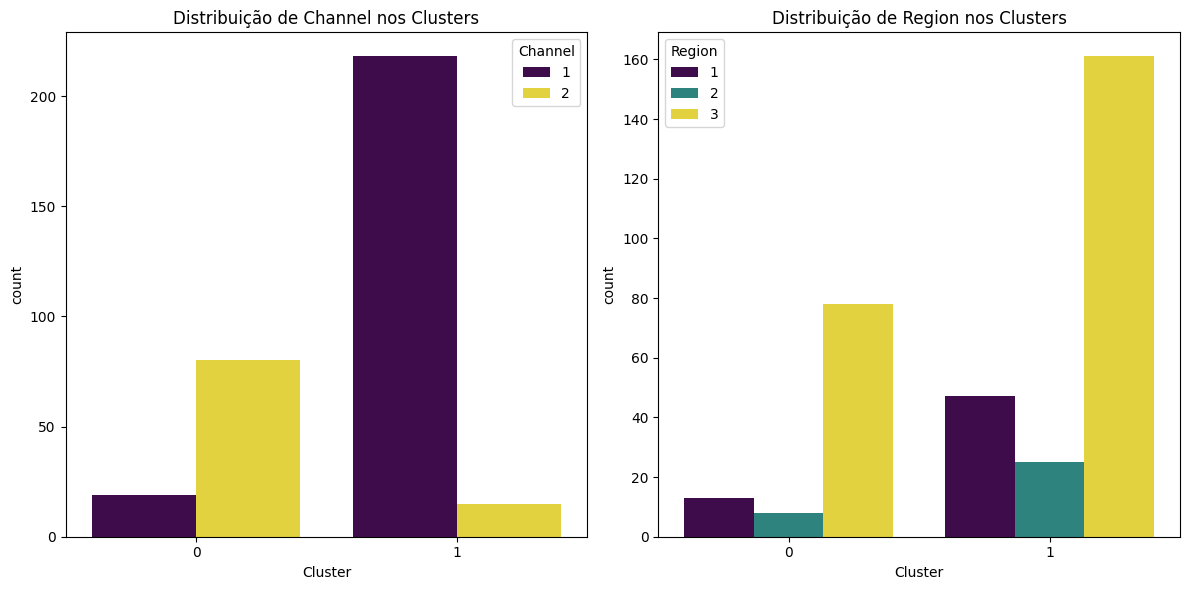

In [ ]:
data_customers = pd.read_csv("Wholesale customers data.csv")

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_no_outliers)

# Adicionar de volta as colunas Channel e Region ao DataFrame sem outliers
data_no_outliers_full = data_customers.loc[data_no_outliers.index]
data_no_outliers_full['Cluster'] = kmeans.labels_

# Verificar a distribuição de Channel e Region nos clusters
channel_distribution = data_no_outliers_full.groupby('Cluster')['Channel'].value_counts()
region_distribution = data_no_outliers_full.groupby('Cluster')['Region'].value_counts()

print("Distribuição de Channel nos Clusters:")
print(channel_distribution)

print("\nDistribuição de Region nos Clusters:")
print(region_distribution)

# Plotar a distribuição de Channel e Region
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=data_no_outliers_full, x='Cluster', hue='Channel', palette='viridis')
plt.title('Distribuição de Channel nos Clusters')

plt.subplot(1, 2, 2)
sns.countplot(data=data_no_outliers_full, x='Cluster', hue='Region', palette='viridis')
plt.title('Distribuição de Region nos Clusters')

plt.tight_layout()
plt.show()